# Machine Learning Project - Clustering of Tweets
### K-Means and Hierarchical Clustering

**Dataset:**
Tweets Collected from Twitter's API

**Objective:** Use Unsupervised Learning to cluster the Tweets.

**Methods:**

- Collect data from Twitter using a choice of hashtag (at least 1000 tweets). 
- Use both K-Means and HCA to cluster the collected data
- Draw a dendrogram
- Identify number of optimum clusters, and justify how do I pick the number of clusters
- List the top 10 most frequent words
- Visualize using wordclouds
- Summarize  findings

# Collect the Twitter Data

I utilize the Tweepy package to collect tweets with the hashtag #USMNT, which is the commono abbreviation for "United States Men's National Team".  This refers to the soccer team for the USA.  

In [19]:
# Code adapted from: https://gist.github.com/vickyqian/f70e9ab3910c7c290d9d715491cde44c

query = "#USMNT -filter:retweets"

import tweepy
import pandas as pd

####input your credentials here
consumer_key = "xxxxxxxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxxxx"
access_token = "xxxxxxxxxxxxxxxx-sviV3OxTCaUwb94E1fc4q70c0yMIGb"
access_token_secret = "xxxxxxxxxxxxxxxx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

dates = []
tweet_texts = []

for tweet in tweepy.Cursor(api.search,q=query,count=1000,
                           lang="en",
                           since="2021-09-14").items():
    #print (tweet.created_at, tweet.text)
    dates.append(tweet.created_at)
    tweet_texts.append(tweet.text)

df = pd.DataFrame()
df['Date'] = dates
df['Tweet'] = tweet_texts

df.to_csv("Tweets.csv")

df.head()

,Date,Tweet
0,2021-09-23 20:58:50,"Yes, it is Roots own Johnny Rodriguez on the s..."
1,2021-09-23 20:45:10,Weston McKennie.\n\n#McKennie #Juventus #Conti...
2,2021-09-23 20:44:18,Sign em’ up! #usmnt #usynt https://t.co/MAlHC...
3,2021-09-23 20:19:17,While McKinnie was out crashing bachelorette p...
4,2021-09-23 20:04:29,@herculezg sat down with @ManagerTactical &amp...


In [20]:
len(dates)

1320

There are 1320 tweets in my dataset. 

## Pre Process the Data

The preview from the .head() method shows that I will need to perform the following tweet cleaning:

- Make Lowercase
- Remove Punctuation
- Remove Numbers
- Strip Whitespace
- Remove Stopwords
- Word Stemming

In [43]:
df = pd.read_csv('Tweets.csv')
df.head()

,Unnamed: 0,Date,Tweet
0,0,2021-09-23 20:58:50,"Yes, it is Roots own Johnny Rodriguez on the s..."
1,1,2021-09-23 20:45:10,Weston McKennie.\n\n#McKennie #Juventus #Conti...
2,2,2021-09-23 20:44:18,Sign em’ up! #usmnt #usynt https://t.co/MAlHC...
3,3,2021-09-23 20:19:17,While McKinnie was out crashing bachelorette p...
4,4,2021-09-23 20:04:29,@herculezg sat down with @ManagerTactical &amp...


In [44]:
# Make Messages All Lowercase
df['clean_tweet'] = df['Tweet'].str.lower()

# Remove Puntuation
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^\w\s]+', '')

# Remove Numbers
df['clean_tweet'] = df['clean_tweet'].str.replace('\d+', '')

# Strip White Space
df['clean_tweet'] = df['clean_tweet'].str.strip()


# Remove Stop Words
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Remove the hashtag because it will obviously show up a lot and skew the data
# Add more stopwords
extra_words = ["usmnt"]
stop_words = stop + extra_words

# Remove stopwords
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df.head(15)

# Source: Week 3 Assignment

,Unnamed: 0,Date,Tweet,clean_tweet
0,0,2021-09-23 20:58:50,"Yes, it is Roots own Johnny Rodriguez on the s...",yes roots johnny rodriguez stunning goal oakla...
1,1,2021-09-23 20:45:10,Weston McKennie.\n\n#McKennie #Juventus #Conti...,weston mckennie mckennie juventus continassa
2,2,2021-09-23 20:44:18,Sign em’ up! #usmnt #usynt https://t.co/MAlHC...,sign em usynt httpstcomalhcxyrcl
3,3,2021-09-23 20:19:17,While McKinnie was out crashing bachelorette p...,mckinnie crashing bachelorette parties guy may...
4,4,2021-09-23 20:04:29,@herculezg sat down with @ManagerTactical &amp...,herculezg sat managertactical amp talk things ...
5,5,2021-09-23 19:55:24,EMMANUEL SABBI - 2021 - Goals and skills https...,emmanuel sabbi goals skills httpstcoxlvzaoeiq ...
6,6,2021-09-23 19:41:25,"Over two years ago, I wrote a blog post about ...",two years ago wrote blog post greggs plan vibe...
7,7,2021-09-23 19:34:52,#USMNT Luca de la Torre went the full 90 for H...,luca de la torre went full heracles alemlo pas...
8,8,2021-09-23 19:33:22,#USMNT Sergino Dest starts for Barcelona today,sergino dest starts barcelona today
9,9,2021-09-23 19:33:02,#USMNT Bryan Reynolds is on the bench for Roma...,bryan reynolds bench roma today


### Stemming

In [45]:
# Word Stemming

from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

# Stem every word
df['stemmed_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,Unnamed: 0,Date,Tweet,clean_tweet,stemmed_tweet
0,0,2021-09-23 20:58:50,"Yes, it is Roots own Johnny Rodriguez on the s...",yes roots johnny rodriguez stunning goal oakla...,yes root johnni rodriguez stun goal oaklandroo...
1,1,2021-09-23 20:45:10,Weston McKennie.\n\n#McKennie #Juventus #Conti...,weston mckennie mckennie juventus continassa,weston mckenni mckenni juventus continassa
2,2,2021-09-23 20:44:18,Sign em’ up! #usmnt #usynt https://t.co/MAlHC...,sign em usynt httpstcomalhcxyrcl,sign em usynt httpstcomalhcxyrcl
3,3,2021-09-23 20:19:17,While McKinnie was out crashing bachelorette p...,mckinnie crashing bachelorette parties guy may...,mckinni crash bachelorett parti guy may taken ...
4,4,2021-09-23 20:04:29,@herculezg sat down with @ManagerTactical &amp...,herculezg sat managertactical amp talk things ...,herculezg sat managertact amp talk thing socce...


### Vectorization

Vectorization is a key step in data preparation.  Vectorization creates a matrix with every word in the dataset as a column.  The rows of the matrix are each message in the data, with 1s in the column for the word included in the message. This helps 'quanitfy' the text data in a way that the model can analyze.

It is important to fit the vector on the train data only.  Then the vector is used to transform both the train and test sets. 

In [86]:
# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer and fit on the training set
vect = CountVectorizer()
vect.fit(df['stemmed_tweet'])
x = vect.transform(df['stemmed_tweet'])

### TF-IDF

TF-IDF is also important for text analysis.  It has two components:

- TF = "Term Frequency"
- IDF = "Inverse Document Frequency"

In a text database, the frequency of words could be inversely correlated to how important the word is.  Common words might not reveal much about patterns for classifications.  But some words that are used less frequently are key words in discovering patterns.   

TF-IDF transformation provides word frequency scores for each word in the data, with less important common words having less significance than key words.  It acts to highlight interesting words in a message - the ones that might be frequent in a message, but not necessarily frequent across messages.

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x)
x_tfidf = tfidf_transformer.transform(x)

In [89]:
print(x_tfidf.shape)
print(type(x_tfidf))
print(x_tfidf.toarray())

(1320, 4141)
<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# List the Top 10 Most Frequent Words

In [49]:
# Get all the words in the tweets
tweets = []

for x in range(len(df['stemmed_tweet'])):
    tweets.append(df['stemmed_tweet'][x])
  
        
# Put words in list
tweet_words = []

for tweet in tweets:
    words = tweet.split()
    for word in words:
        tweet_words.append(word)
                
#Remove duplicates
unique_tweet_words = set(tweet_words)

print("Unique words in Tweet Data:",len(unique_tweet_words))

Unique words in Tweet Data: 4158


Create dictionary of word and counts of number of Tweets that they occur in. I take the approach of counting how many tweets a given word appears in rather than the total amount of times a word occurs because I feel like it is more insightful to know if a word is used by multiple tweets, rather than just being used a lot in a few tweets.

In [50]:
from tqdm import tqdm 

# Initiate dictionaries 
tweet_word_freq = {}

# Go through unique words
for word in tqdm(list(unique_tweet_words)):
    # Loop through each row of the database
    for x in range(len(df['stemmed_tweet'])):
        # if the word isn't yet in the dicitonary, instantiate it
        if word not in tweet_word_freq:
            tweet_word_freq[word] = 0

        # If the word is in the message for that row, increment the counter
        # We are counting how many messages (rows) that each word in ham occurs, and getting the most frequent
        if word in df['stemmed_tweet'][x].split():
            tweet_word_freq[word] += 1

100%|██████████| 4158/4158 [00:36<00:00, 113.27it/s]


In [51]:
# Sort the dictionary above.  The strucuture is word as the key and number of messages containing that word as the value
# Sort by value
sorted_tweet_word_freq = {k: v for k, v in sorted(tweet_word_freq.items(), key=lambda item: item[1], reverse=True)}
# Save a list of the top 5 values.  These are the words that occur in the most rows of Ham
top_10_words = list(sorted_tweet_word_freq.items())[0:10]

print("The top 10 Words:",top_10_words)

The top 10 Words: [('start', 137), ('player', 109), ('get', 103), ('today', 91), ('play', 79), ('good', 66), ('hopp', 63), ('game', 59), ('soccer', 55), ('minut', 55)]


The top words are, as expected, relevant to soccer and perhaps about games that the fans are watching or getting ready to watch.  

# Visualize Using Wordclouds

(-0.5, 399.5, 199.5, -0.5)

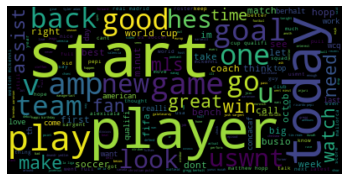

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud().generate(' '.join(df['stemmed_tweet']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')

# Source: Prior Coursework in MSDS 640

# K-Means Analysis

Before building my models, I convert the sparse matrix to an array.  This makes it possible to input into the PCA plots and the Dendograms.

In [120]:
x_tfidf_dense = x_tfidf.toarray()

Now, I build the K-Means model.  I run iteratively to get the sum of squares for different number of clusters.

In [121]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

# import stuff
from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    
    #model.fit(x_tfidf)
    model.fit(x_tfidf_dense)    
    
    #sum_sq.append(-model.score(x_tfidf))
    sum_sq.append(-model.score(x_tfidf_dense))
    
# Source: Week 6 Lecture

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


Now, I use elbow and np.diff() plots to determine the optimal number of clusters.

[1300.1093118398467,
 1295.244523671906,
 1287.3225821154215,
 1284.3333946911478,
 1279.586956328347,
 1274.1138693314215,
 1270.566766025042,
 1266.895416036658,
 1262.1901222790916,
 1258.8743487329423,
 1256.6312692424788,
 1253.8874260920547,
 1250.355444241212,
 1246.4646843174817,
 1243.8267271360517,
 1241.3774862879616,
 1238.9962553093403,
 1237.746841214599,
 1234.2588449917355,
 1232.9847844671272,
 1229.8238001757998,
 1225.801427150579,
 1224.5572983418185,
 1220.3089614017692,
 1218.8982143101455,
 1215.9134642096378,
 1214.692554795521,
 1211.8369978851822]

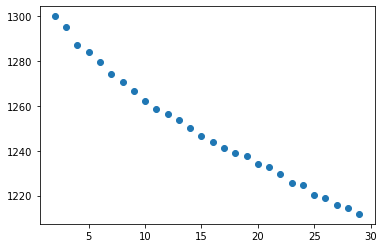

In [122]:
# make our scree plot to visually see the optimal number of clusters

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(range(2, 30), sum_sq)
np.diff(sum_sq)
sum_sq

# Source: Week 6 Lecture

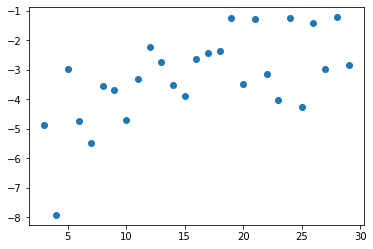

In [124]:
# compare the scree plot with a np.diff() plot

plt.scatter(range(3, 30), np.diff(sum_sq))

# Source: Week 6 Lecture

The plots don't give me any clear idea of optimal clusters.  But looking at around 15-20 clusters, there is a small elbow in the scree plot, and in the diff plot, the trend seems to flatten slightly.  I will use 15 as my optimal k value.

In [125]:
# kmeans model with the optimal number of clusters, 15 clusters
model = KMeans(n_clusters=15, random_state=42)
model.fit(x_tfidf_dense)

# gather the predictions
preds= model.predict(x_tfidf_dense)

# Source: Week 6 Lecture

In [126]:
from sklearn import metrics
score = metrics.silhouette_score(x_tfidf_dense, preds)
score

0.012352447946264312

The silhouette score for 15 clusters is pretty low.  With tweet data, it is not that surprising that the separation of clusters would be weak, especially with not that high of a number for clusters, considering all the different subjects people tweet about.

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

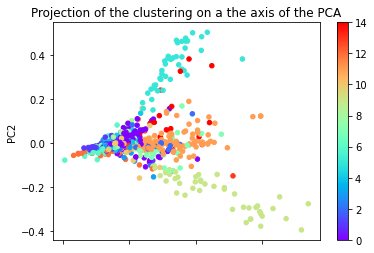

In [127]:
# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(x_tfidf_dense)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

Not surprisingly for unstructured and high-variance data like tweets, there aren't really many discernaable clusters from this model.  There are some tails at the top and bottom, but everything in between is all very close together.

#### Using Silhouette Score to find the optimal number of clusters.

In [128]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(x_tfidf_dense)
    # gather the predictions
    preds= model.predict(x_tfidf_dense)
    score = metrics.silhouette_score(x_tfidf_dense, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.004323335125592765
Silhouette score for  3  clusters:  0.004530889755774022
Silhouette score for  4  clusters:  0.005778385369574026
Silhouette score for  5  clusters:  0.006148841477032822
Silhouette score for  6  clusters:  0.007099265019382858
Silhouette score for  7  clusters:  0.007516273286723259
Silhouette score for  8  clusters:  0.008364231667946264
Silhouette score for  9  clusters:  0.008584750395110547
Silhouette score for  10  clusters:  0.010231664763255493
Silhouette score for  11  clusters:  0.010838112992887441
Silhouette score for  12  clusters:  0.011187029344977265
Silhouette score for  13  clusters:  0.011249155966152126
Silhouette score for  14  clusters:  0.011640451498252146
Silhouette score for  15  clusters:  0.012352447946264312
Silhouette score for  16  clusters:  0.012685655145127928
Silhouette score for  17  clusters:  0.012546345306099929
Silhouette score for  18  clusters:  0.012755282986124543
Silhouette score for  

According to the highest silhouette score, it appears that the optimal number of clusters is 29.  This is in line with the plots from above, as there wasn't a clear elbow, but there was a clear trend that the error kept going down as the clusters increased.  This isn't too surprising with tweet data.  There is so much variety in what people tweet that it makes sense that the data wouldn't be strongly classified into a few clusters, but would instead take many.

In [129]:
# kmeans model with the optimal number of clusters, 29 clusters
model = KMeans(n_clusters=29, random_state=42)
model.fit(x_tfidf_dense)

# gather the predictions
preds= model.predict(x_tfidf_dense)

score = metrics.silhouette_score(x_tfidf_dense, preds)
score

# Source: Week 6 Lecture

0.014930319412642834

The silhouette score for 29 clusters is indeed higher than the one for 15 clusters above.  This will be more optimal.

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

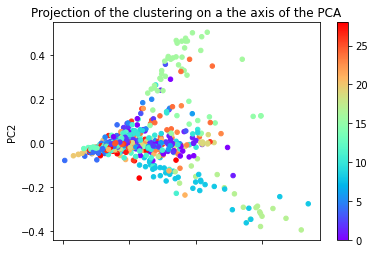

In [130]:
# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(x_tfidf_dense)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

The final PCA still looks similar to the non-optimal one above.  A few tails classified into clusters, but everything in the middle is dense and clustered differently.  

In reality, an optimal number of clusters will be more than 29, but for the purpose of the assignment I will leave it as is.  It was a good exercise in finding out how to choose the number of clusters to use.  Using the Scree plot and Silhouette scores are a good way to optimize the number of clusters chosen.

# HCA

In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## Show a Dendrogram

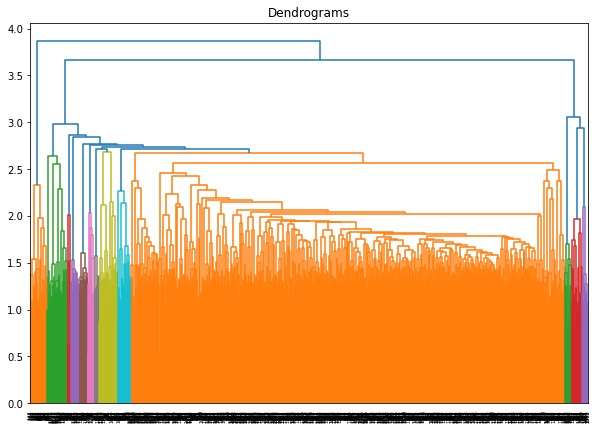

In [132]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_tfidf_dense, method='ward'))

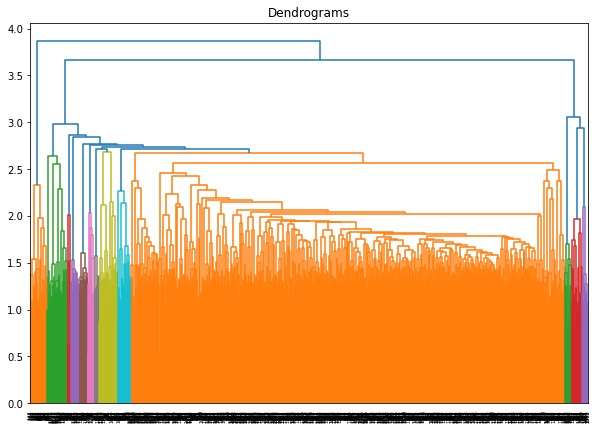

In [133]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_tfidf_dense, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

The dataset for this problem is complex and the dendrogram reflects this.  It is hard to see where the red line demarcating optimal clusters is, so I will just use the optimal number found from K-means, 29, and see how it compares.

In [134]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=29, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x_tfidf_dense)

array([ 2, 18,  0, ...,  0,  0,  0], dtype=int64)

We can see the values of 0s through 28s in the output since we defined 29 clusters.

This dataset is not easily clusterable, and the PCA from above showed that.  HCA will be similar to the K-means for this data in that it will be best to have a higher number of clusters.

## Alternative Dataset

The Twitter data that I used above doesn't seem very well suited to a classification problem.  Below, I perform the same unsupervised learning methods as above on the alternative dataset.

#### Load the Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Normalize the Data

In [2]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

# Source: Week 6 Lecture

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


## K-Means Analysis

In [3]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

# import stuff
from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    
    model.fit(data_scaled)    
    
    sum_sq.append(-model.score(data_scaled))
    
# Source: Week 6 Lecture

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


[58.21277219851369,
 45.95062016191631,
 36.84481334548574,
 30.633981797948174,
 26.951845829300964,
 24.219417192876666,
 22.217004929080016,
 21.0388732727793,
 19.835326238459608,
 18.821942459384633,
 18.040764477850754,
 17.10527459081889,
 16.443391035129327,
 15.702039692814923,
 15.031664395941268,
 14.479958572511151,
 13.673972445379803,
 12.988295932351107,
 12.628429409049115,
 12.466012141342262,
 12.130434434528624,
 11.844868920547537,
 11.537549834717117,
 11.16895693889072,
 11.077641839097994,
 10.67195917714659,
 10.493100629850373,
 10.288044001105458]

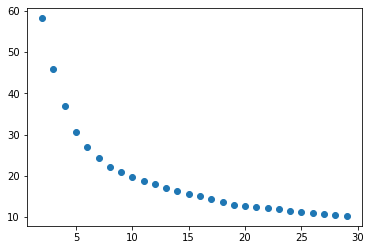

In [4]:
# make our scree plot to visually see the optimal number of clusters

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(range(2, 30), sum_sq)
np.diff(sum_sq)
sum_sq

# Source: Week 6 Lecture

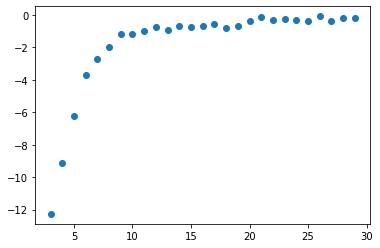

In [5]:
# compare the scree plot with a np.diff() plot

plt.scatter(range(3, 30), np.diff(sum_sq))

# Source: Week 6 Lecture

The eblow and np.diff() plots have much more defined curves than on the tweet data.  Here, there appears to be a plateau in the 10-15 cluster range. I will use 10 as my number of clusters.

In [6]:
# kmeans model with the optimal number of clusters, 10 clusters
model = KMeans(n_clusters=10, random_state=42)
model.fit(data_scaled)

# gather the predictions
preds= model.predict(data_scaled)

# Source: Week 6 Lecture

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(data_scaled, preds)
score

# Source: Week 6 Lecture

0.31443768634664854

The score of .31 is much higher than my best score from the tweet data, but I will try to get a higher score.

In [8]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(data_scaled)
    # gather the predictions
    preds= model.predict(data_scaled)
    score = metrics.silhouette_score(data_scaled, preds)
    print('Silhouette score for ',n,' clusters: ',score)
    
# Source: Week 6 Lecture

Silhouette score for  2  clusters:  0.5002245229760047
Silhouette score for  3  clusters:  0.4478257540380591
Silhouette score for  4  clusters:  0.3916603082929343
Silhouette score for  5  clusters:  0.3747446763093898
Silhouette score for  6  clusters:  0.36552543309244806
Silhouette score for  7  clusters:  0.3368109636738773
Silhouette score for  8  clusters:  0.31748226099487326
Silhouette score for  9  clusters:  0.31410088030096944
Silhouette score for  10  clusters:  0.31443768634664854
Silhouette score for  11  clusters:  0.2686609594622055
Silhouette score for  12  clusters:  0.2715400603418956
Silhouette score for  13  clusters:  0.26454610771553005
Silhouette score for  14  clusters:  0.24530992330729598
Silhouette score for  15  clusters:  0.2659849567523152
Silhouette score for  16  clusters:  0.25491042149340193
Silhouette score for  17  clusters:  0.24898117989041388
Silhouette score for  18  clusters:  0.24912032770830767
Silhouette score for  19  clusters:  0.24976448

The Silhouette score is highest for 2 clusters, and gives a value of 0.50 which is a solid measure of cluster separation.

In [9]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=2, random_state=42)
model.fit(data_scaled)

# gather the predictions
preds= model.predict(data_scaled)

from sklearn import metrics
score = metrics.silhouette_score(data_scaled, preds)
score

# Source: Week 6 Lecture

0.5002245229760047

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

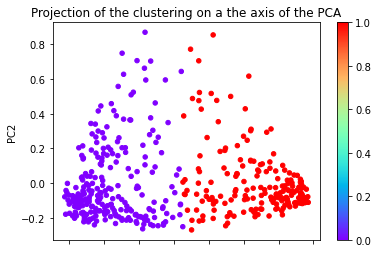

In [16]:
from sklearn.decomposition import PCA

# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

# Source: Week 6 Lecture

The PCA shows the solid separation indicated by the silhouette score.  This dataset has two clear clusters.

## Hierarchical Cluster Analysis (HCA)

Let's see if HCA confirms what K-Means showed us.

Dendrogram

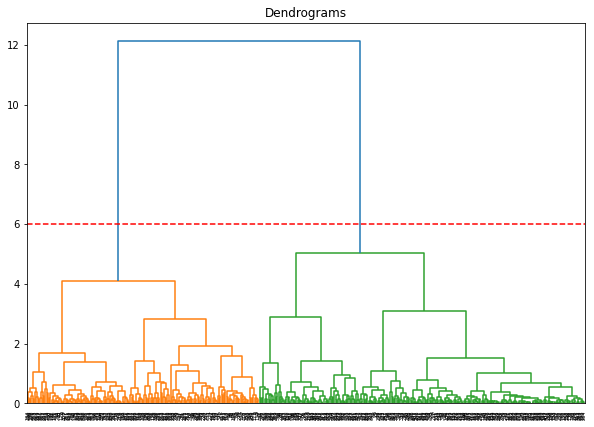

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

# Source: Week 6 Lecture

The red dotted line cuts throught the tree at the point where the tree has the largest vertical distance that doesn't interesect any clusters.  This shows the optimal number of clusters to use, which is again, 2.

Below, I create the HCA cluster model of Agglomerative Clustering.  I use 2 clusters and then show the groupings into either cluster, 1 or 0.

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

# Source: Week 6 Lecture

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Finally, I can plot the clusters comparing different variables.  The features for this dataset include: Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen.

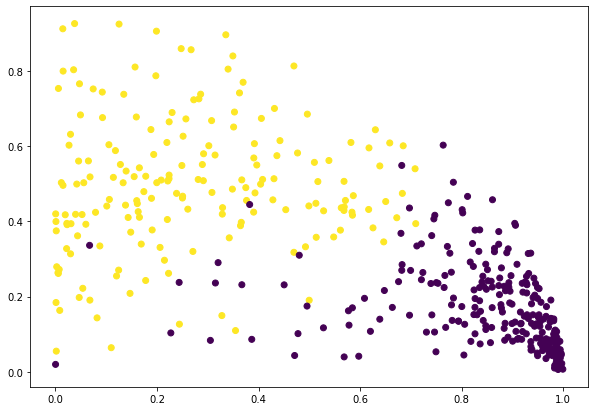

In [21]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Fresh'], data_scaled['Milk'], c=cluster.labels_) 

# Source: Week 6 Lecture

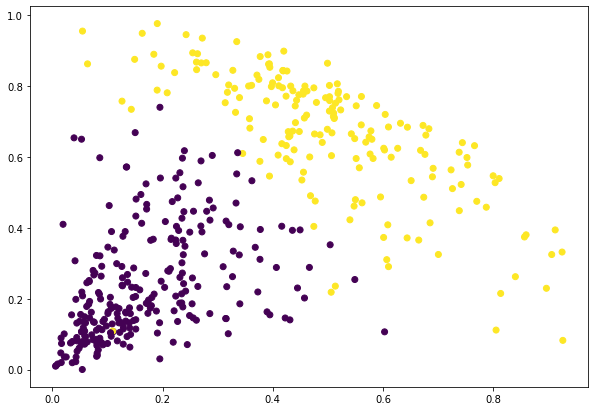

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

# Source: Week 6 Lecture

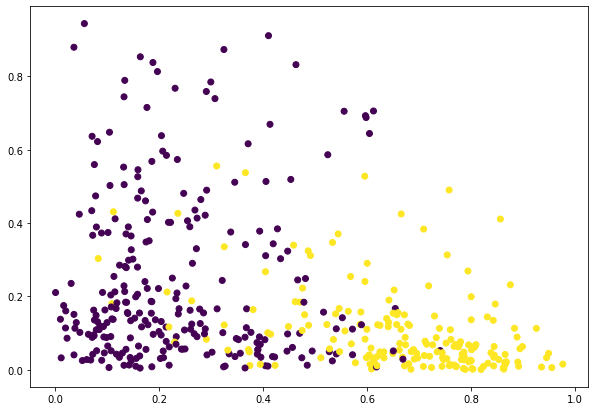

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Grocery'], data_scaled['Frozen'], c=cluster.labels_) 

# Source: Week 6 Lecture

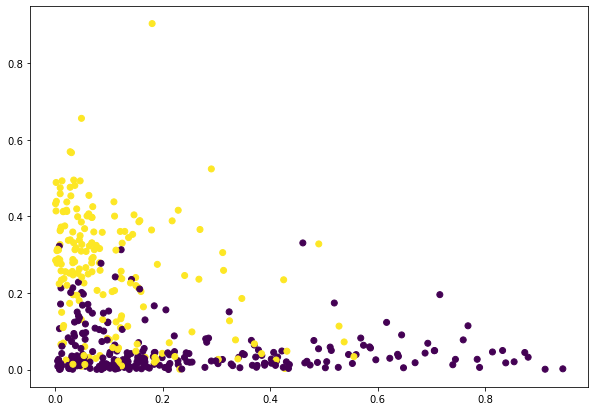

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Frozen'], data_scaled['Detergents_Paper'], c=cluster.labels_) 

# Source: Week 6 Lecture

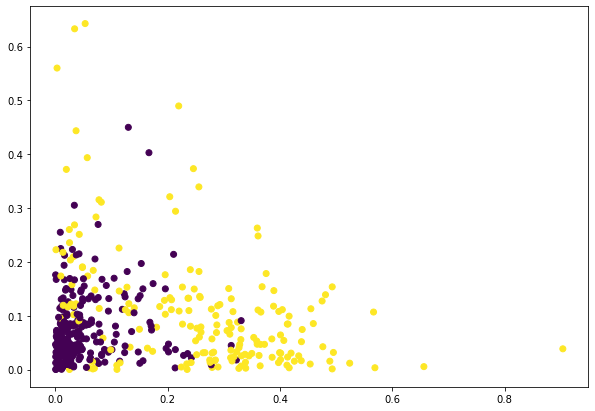

In [25]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Detergents_Paper'], data_scaled['Delicassen'], c=cluster.labels_) 

# Source: Week 6 Lecture

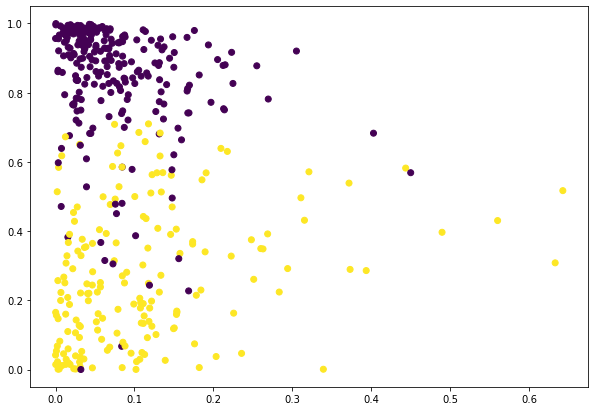

In [26]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Delicassen'], data_scaled['Fresh'], c=cluster.labels_) 

# Source: Week 6 Lecture

Most of the plots make it easy to depict two clusters.  The relationships like the ones between:
    
- Fresh and Milk
- Milk and Grocery
- Delicassen and Fresh

Are more easily separated than the other relationships.  These probably contribute more to the model's learning and influence the silhouette score, and therefore the decision to have 2 clusters, with a higher weights.

Clearly, this dataset is much more suited for clustering than the tweets dataset.  However, both sets proposed and interesting unsupervised learning application.